In [ ]:
import matplotlib.pyplot as plt
from synthetic_information_spread_experiments import ExperimentResult
import networkx as nx

with open('../results/synthetic_5_bdi_is.json', "r") as f:
    result5 = ExperimentResult.model_validate_json(f.read())

with open("../results/synthetic_10_bdi_is.json", "r") as f:
    result10 = ExperimentResult.model_validate_json(f.read())



In [9]:
def get_networkx_name_graph(result: ExperimentResult):
    G = nx.Graph()
    result.dataset.agents
    result.dataset.edges
    G.add_edges_from(
        (
            (result.dataset.agents[u].full_name, result.dataset.agents[v].full_name)
            for (u, v) in result.dataset.edges
        )
    )
    return G

result5_graph = get_networkx_name_graph(result5)
result10_graph = get_networkx_name_graph(result10)

In [ ]:
result5_pos = nx.spring_layout(result5_graph)
result10_pos = nx.spring_layout(result10_graph)

# # print graph according to positions
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# nx.draw(
#     result5_graph,
#     pos=result5_pos,
#     with_labels=True,
#     node_size=500,
#     node_color="lightblue",
#     font_size=10,
#     font_color="black",
#     edge_color="gray",
# )
# plt.title("5 Agents - Information Spread")
# # mark some node with red color

# for node_id, answer in enumerate(result5.epoch_agents_responses[0]):
#     if answer.final_answer:
#         nx.draw_networkx_nodes(
#             result5_graph,
#             pos=result5_pos,
#             nodelist=[result5.dataset.agents[node_id].full_name],
#             node_color="red",
#             node_size=500,
#         )


# define a function which iterates over the all the epochs in the experiment and draws graphs for each epoch
# reuse the code above to draw the graph for each epoch
def draw_epoch_graphs(result: ExperimentResult, graph: nx.Graph, pos):
    for epoch in range(len(result.epoch_agents_responses)):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        nx.draw(
            graph,
            pos=pos,
            with_labels=True,
            node_size=500,
            node_color="lightblue",
            font_size=10,
            font_color="black",
            edge_color="gray",
        )
        plt.title(
            f"{len(result.dataset.agents)} Agents - Information Spread - Epoch {epoch + 1}"
        )
        # mark some node with red color
        for node_id, answer in enumerate(result.epoch_agents_responses[epoch]):
            if answer.final_answer:
                nx.draw_networkx_nodes(
                    graph,
                    pos=pos,
                    nodelist=[result.dataset.agents[node_id].full_name],
                    node_color="red",
                    node_size=500,
                )
        plt.show()



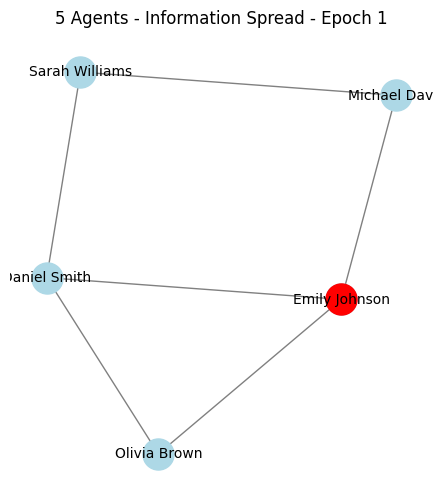

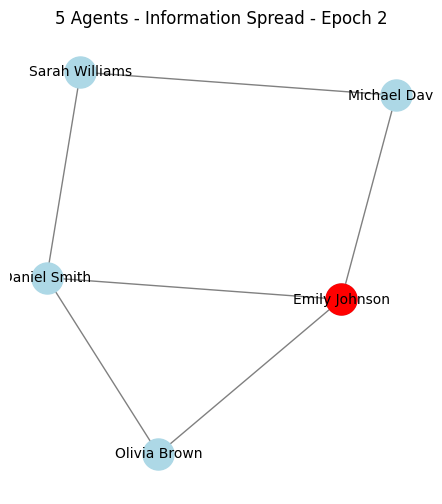

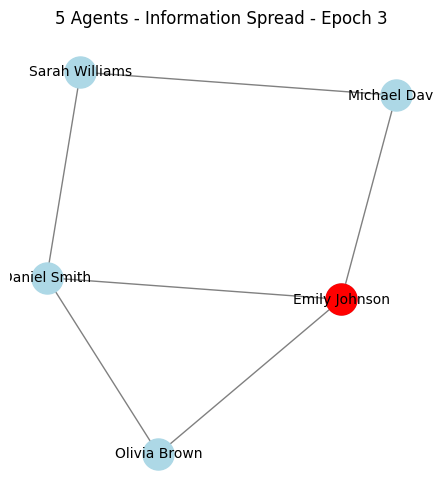

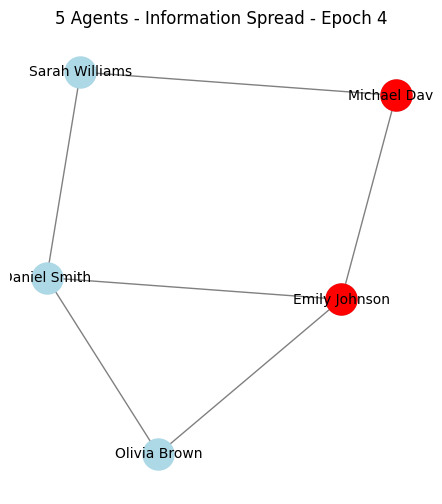

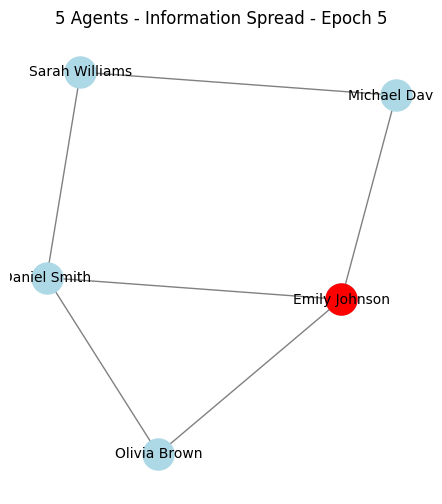

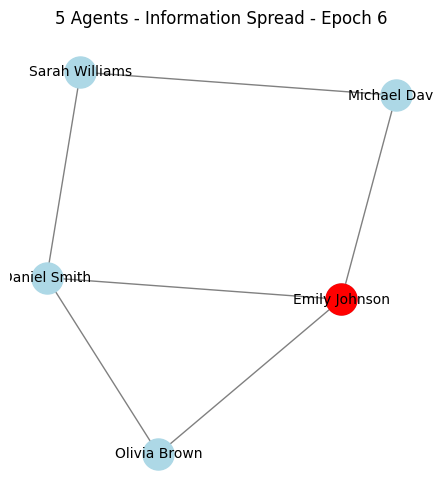

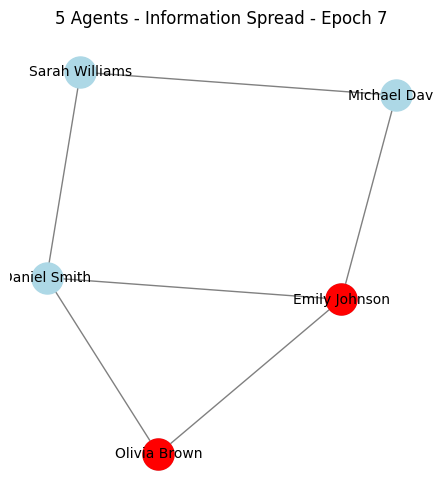

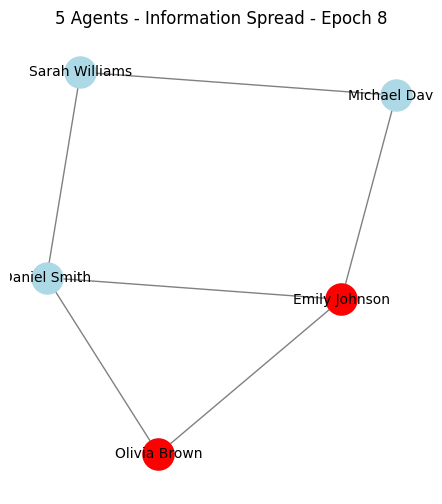

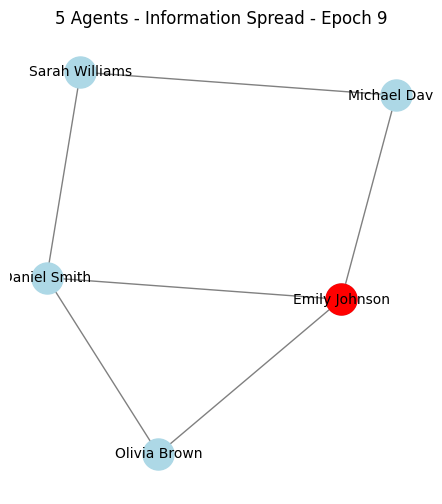

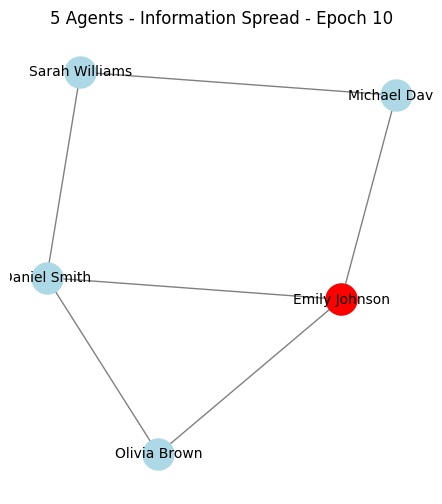

In [16]:
draw_epoch_graphs(result5, result5_graph, result5_pos)

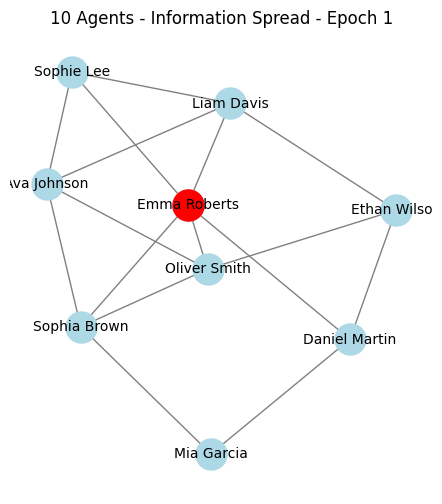

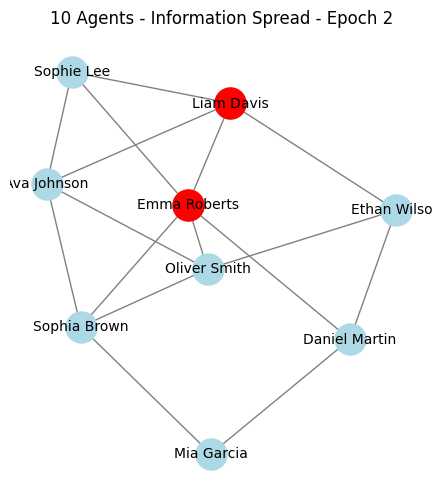

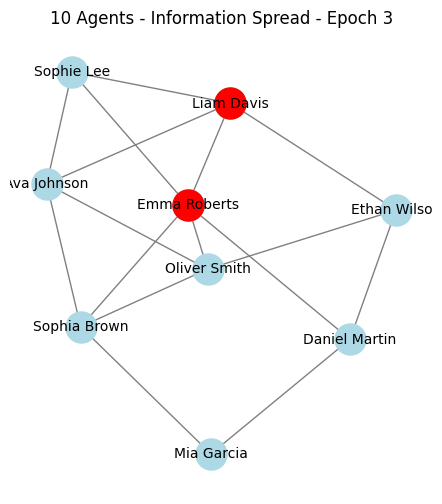

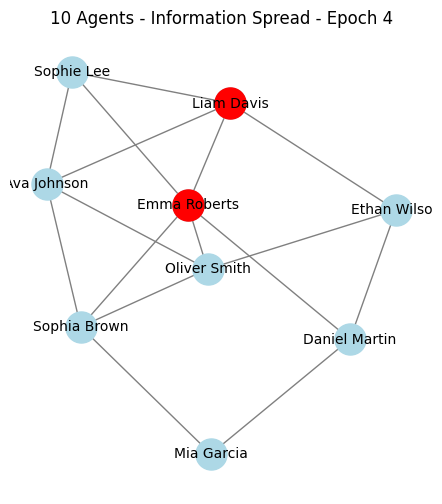

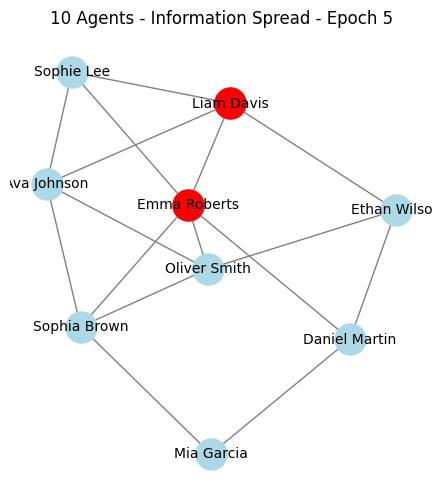

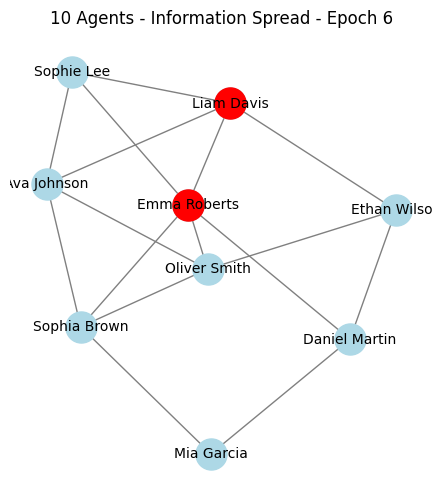

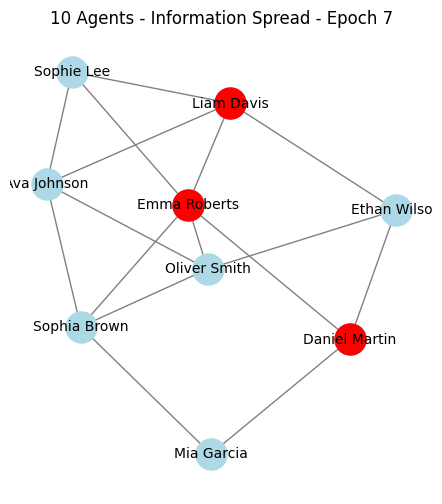

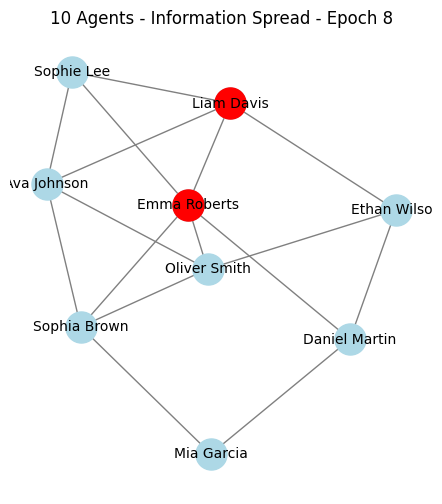

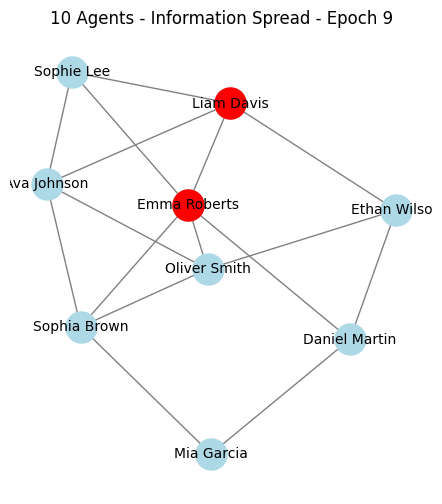

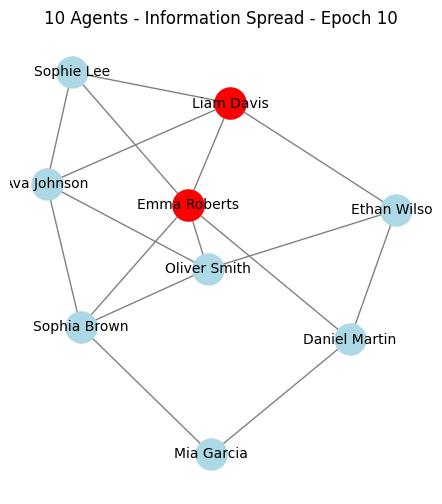

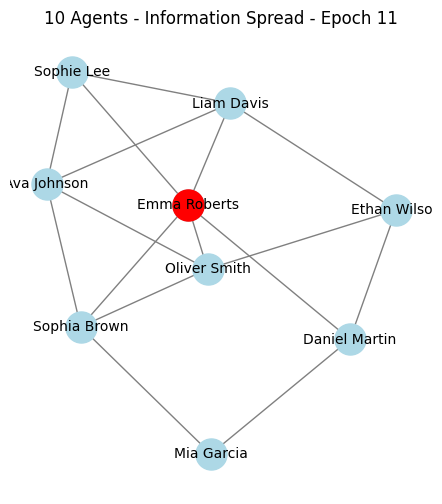

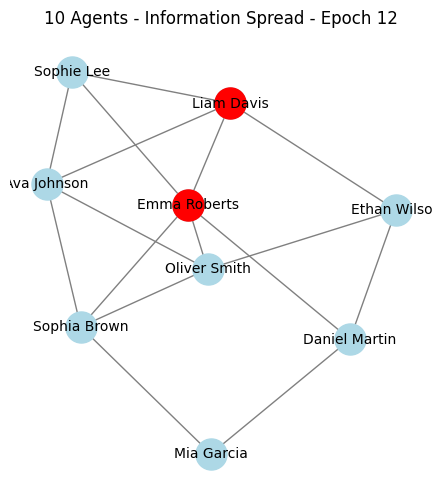

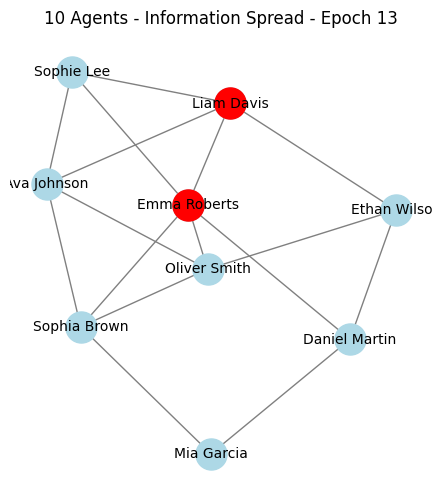

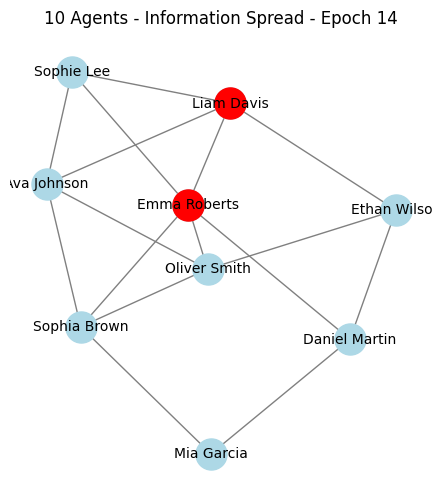

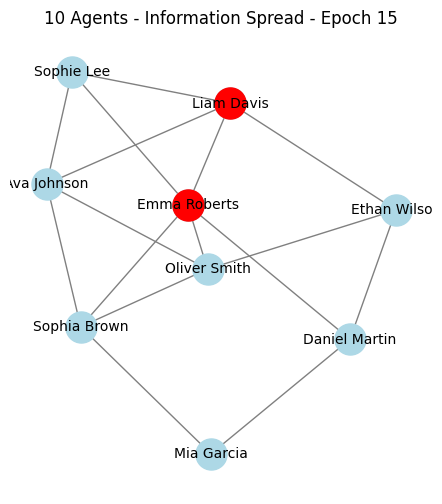

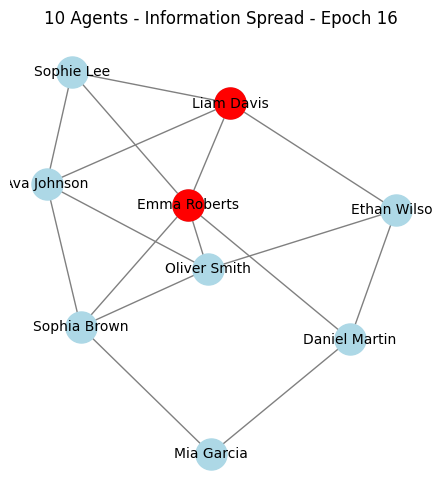

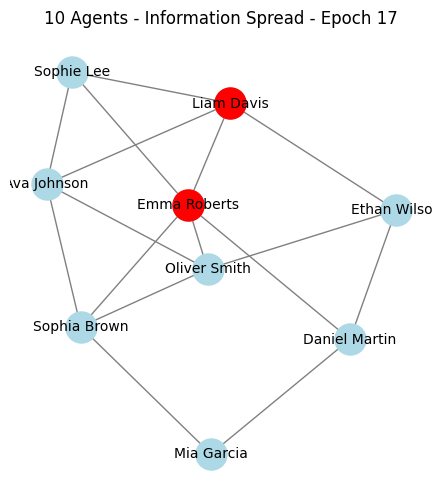

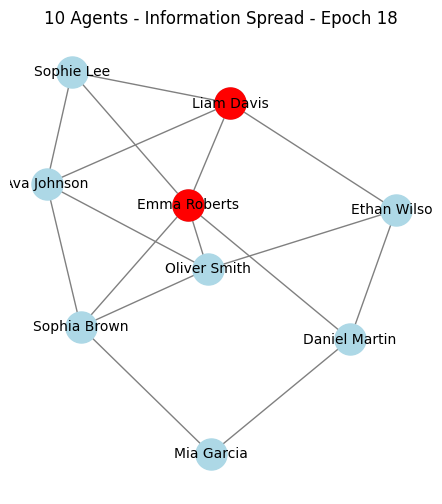

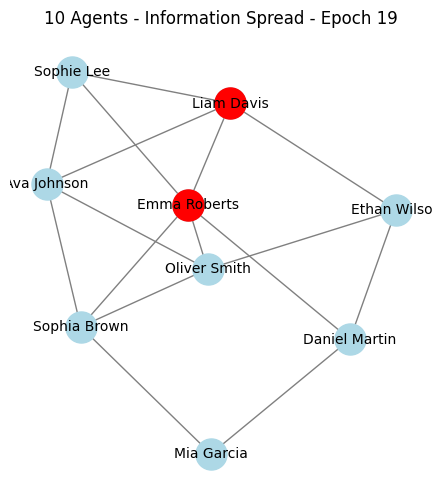

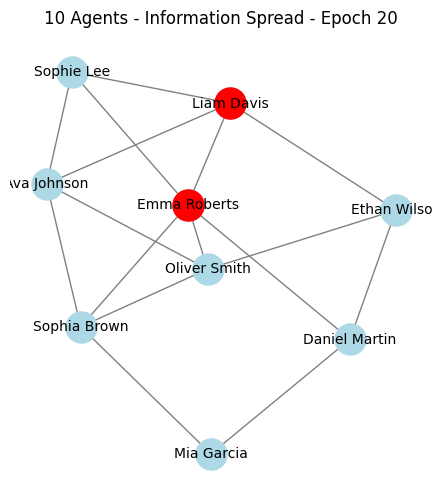

In [17]:
draw_epoch_graphs(result10, result10_graph, result10_pos)